# Exercise 1: Traveltime Inversion with pyGIMLi -- (c): Inversion

- **Transform 2021 Tutorial: Geophysical modeling & inversion with pyGIMLi** - https://www.pygimli.org
- **Video:** https://www.youtube.com/watch?v=w3pu0H3dXe8
- **Repo:** https://github.com/gimli-org/transform2021


<div class="alert alert-block alert-info">
    <h2>Info</h2>
    <ul>
        <li> 1a: Notebook to create a model
        <li> 1b: Notebook to create data
        <li> 1c: Notebook to invert data
    </ul>
    <h2>Tasks PPESO</h2>
    <ul>
        <li> Create different models (look up some velocities).
        <li> Generate and save synthetic data for some different models (give them different names).
        <li> Invert your data; use the different models.
        <li> Play with the initial model.
        <li> What can you resolve better? A high-velocity block in a low velocity background, or a low velocity block in a high velocity background? Why?
    </ul>
</div>

# Introduction to method managers: Traveltime inversion

## Objectives:
1. Load travel time data from [third notebook](./3_Simulating_a_crosshole_traveltime_experiment)
2. Learn about method managers and how they work
3. Use the TravelTimeManager to invert the loaded data
4. Analyze inversion results and play with inversion options

In [13]:
import matplotlib.pyplot as plt

import numpy as np
import pygimli as pg
import pygimli.physics.traveltime as tt

### Load Data 

In [14]:
data = tt.load("traveltime.dat")
print(data)

Data: Sensors: 20 data: 100, nonzero entries: ['err', 'g', 's', 't', 'valid']


### Define function to display data

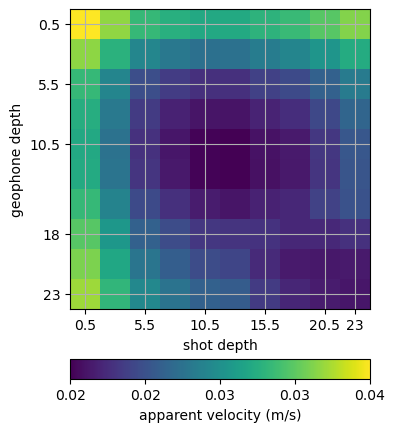

In [15]:
# For displaying data we define a function
from pygimli.viewer.mpl import showVecMatrix
def showCrossholeData(data, vals, **kwargs):
    d = -pg.y(data)  # sensor depth
    ds = d[data["s"]]  # shot depth
    dg = d[data["g"]]  # geophone depth
    ax, cb = showVecMatrix(ds, dg, vals, label="apparent velocity (m/s)", **kwargs);
    ax.set_xlabel("shot depth");
    ax.set_ylabel("geophone depth");

showCrossholeData(data, data["t"])

### Create 2D mesh

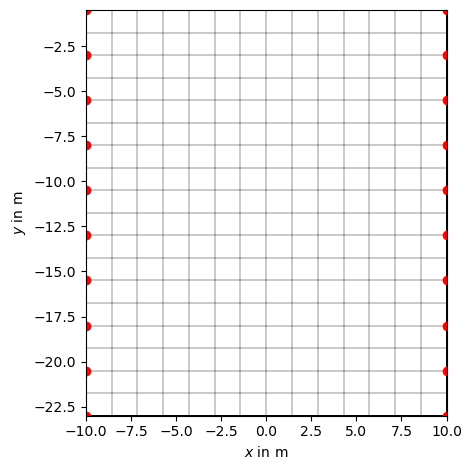

In [16]:
x = np.linspace(min(pg.x(data)), max(pg.x(data)), 15)
y = np.linspace(min(pg.y(data)), max(pg.y(data)), 19)
grid = pg.meshtools.createMesh2D(x, y)
ax, cb = pg.show(grid)
ax.plot(pg.x(data), pg.y(data), "ro");

### Inversion

We create an instance of the [`TravelTimeManager`](https://www.pygimli.org/pygimliapi/_generated/pygimli.physics.traveltime.html?highlight=traveltimemanager#pygimli.physics.traveltime.TravelTimeManager) class with the loaded data. Method Managers work as an interface for end-user interaction and can be seen as simple but complete application classes which manage all tasks of geophysical data processing. In this example we are using the TravelTimeManager from the TravelTime physics module where we use the `invert` method. 

In [17]:
mgr = tt.TravelTimeManager(data)

09/02/25 - 12:08:39 - pyGIMLi - INFO - Found 1 regions.
09/02/25 - 12:08:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/02/25 - 12:08:39 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
09/02/25 - 12:08:39 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001A146AC9620>
Data transformation: Identity transform
Model transformation: Logarithmic transform
min/max (data): 0.02/0.04
min/max (error): 0.13%/0.15%
min/max (start model): 1.0e-03/1.0e-03
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 9804.45
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  882.41 (dPhi = 90.95%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  325.26 (dPhi = 63.02%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  204.08 (dPhi = 37.06%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   86.97 (dPhi = 56.98%) lam: 50.0
--------------------------------------------------------------

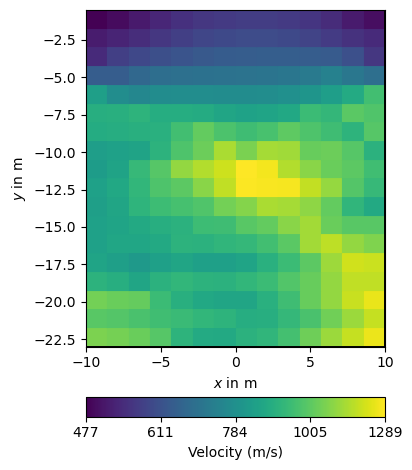

In [18]:
mgr.invert(data, mesh=grid, 
           startModel=0.001,
           useGradient=False,
           #zWeight=1,
           secNodes=3,
           lam=50,
           verbose=True)
mgr.showResult();

The Method Manager also has `showResult()` and `drawRayPaths()` methods.

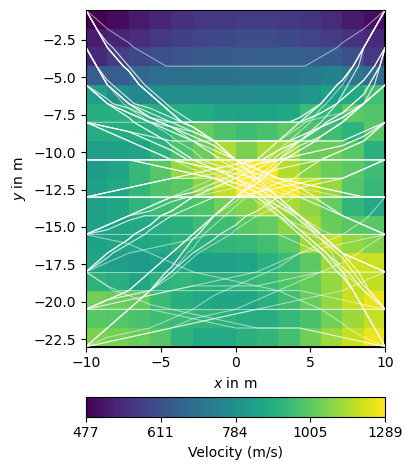

In [19]:
ax, cb = mgr.showResult();
mgr.drawRayPaths(ax);

Now we look at the simulated data (left) and inverted response (right)

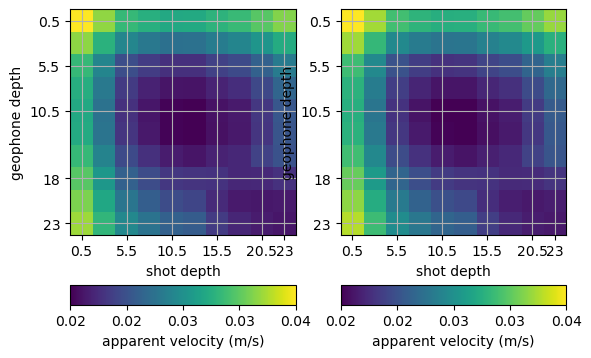

In [20]:
fig, ax = plt.subplots(ncols=2)
showCrossholeData(data, data["t"], ax=ax[0])
showCrossholeData(data, mgr.inv.response, ax=ax[1])

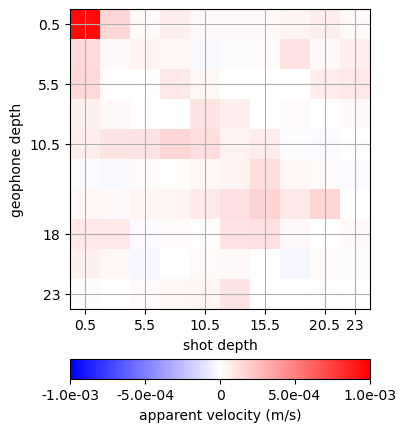

In [21]:
# Have a look at the misfit
misfit = data["t"] - mgr.inv.response
showCrossholeData(data, misfit, cMap="bwr", cMin=-0.001, cMax=0.001)

In [22]:
pg.Report()

--------------------------------------------------------------------------------
  Date: Sun Feb 09 12:09:20 2025 W. Europe Standard Time

                OS : Windows (10 10.0.26100 SP0 Multiprocessor Free)
            CPU(s) : 12
           Machine : AMD64
      Architecture : 64bit
               RAM : 15.7 GiB
       Environment : Jupyter

  Python 3.11.11 | packaged by conda-forge | (main, Dec  5 2024, 14:06:23)
  [MSC v.1942 64 bit (AMD64)]

           pygimli : 1.5.3
            pgcore : 1.5.0
             numpy : 1.26.4
        matplotlib : 3.10.0
             scipy : 1.15.1
              tqdm : 4.67.1
           IPython : 8.32.0
           pyvista : 0.44.2
--------------------------------------------------------------------------------

Data: Sensors: 20 data: 100, nonzero entries: ['err', 'g', 's', 't', 'valid']


09/02/25 - 12:09:20 - pyGIMLi - INFO - Found 1 regions.
09/02/25 - 12:09:20 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/02/25 - 12:09:21 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
09/02/25 - 12:09:21 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001A146DAB9C0>
Data transformation: Identity transform
Model transformation: Logarithmic transform
min/max (data): 0.02/0.04
min/max (error): 0.13%/0.15%
min/max (start model): 1.0e-03/1.0e-03
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 9804.45
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  882.41 (dPhi = 90.95%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  325.26 (dPhi = 63.02%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  204.08 (dPhi = 37.06%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   86.97 (dPhi = 56.98%) lam: 50.0
--------------------------------------------------------------

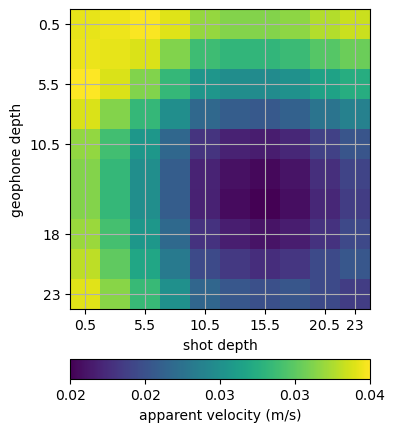

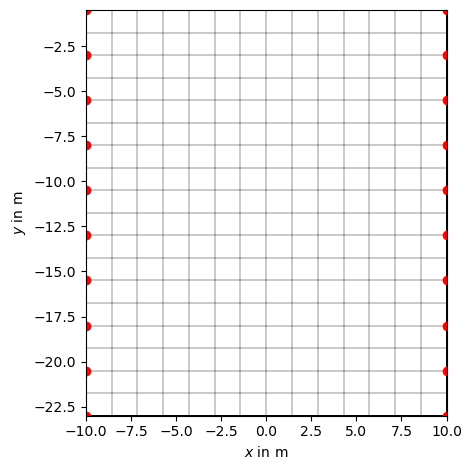

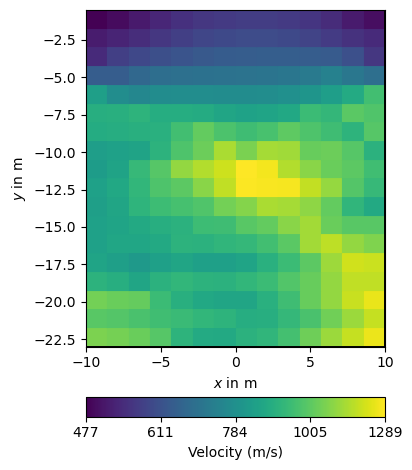

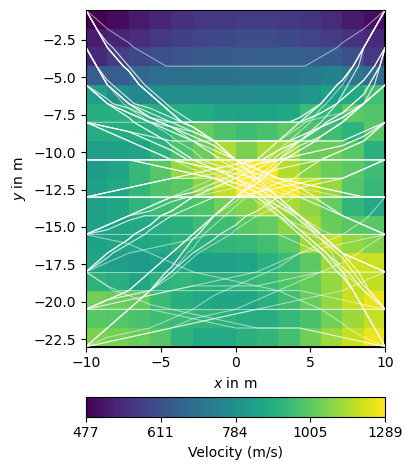

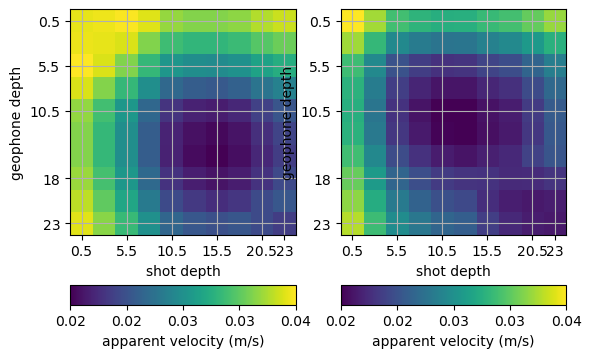

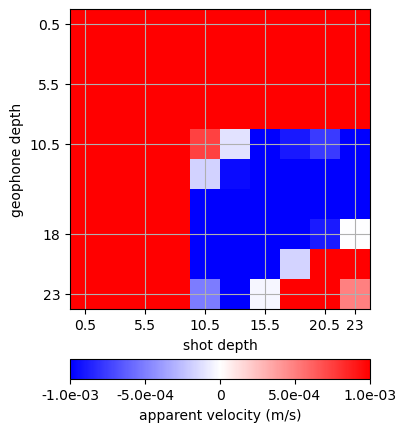

In [23]:
# Loading the new synthesis data
new_data = tt.load("new_traveltime.dat")
print(new_data)

# For displaying data we define a function
from pygimli.viewer.mpl import showVecMatrix
def showCrossholeData(new_data, vals, **kwargs):
    d = -pg.y(new_data)  # sensor depth
    ds = d[new_data["s"]]  # shot depth
    dg = d[new_data["g"]]  # geophone depth
    ax, cb = showVecMatrix(ds, dg, vals, label="apparent velocity (m/s)", **kwargs);
    ax.set_xlabel("shot depth");
    ax.set_ylabel("geophone depth");

showCrossholeData(new_data, new_data["t"])

# Creating a 2D mesh
x = np.linspace(min(pg.x(new_data)), max(pg.x(new_data)), 15)
y = np.linspace(min(pg.y(new_data)), max(pg.y(new_data)), 19)
grid = pg.meshtools.createMesh2D(x, y)
ax, cb = pg.show(grid)
ax.plot(pg.x(new_data), pg.y(new_data), "ro");

mgr = tt.TravelTimeManager(new_data)

mgr.invert(data, mesh=grid, 
           startModel=0.001,
           useGradient=False,
           #zWeight=1,
           secNodes=3,
           lam=50,
           verbose=True)
mgr.showResult();

ax, cb = mgr.showResult();
mgr.drawRayPaths(ax);

# Displaying simulated data and inverted response
fig, ax = plt.subplots(ncols=2)
showCrossholeData(new_data, new_data["t"], ax=ax[0])
showCrossholeData(new_data, mgr.inv.response, ax=ax[1])

# Have a look at the misfit
misfit = new_data["t"] - mgr.inv.response
showCrossholeData(new_data, misfit, cMap="bwr", cMin=-0.001, cMax=0.001)


### Which one is better resolved?

A low-velocity block in a high-velocity background is better to resolve than a high-velocity block in a low-velocity background. This is because of the wave speed effect, as the waves travel time will slow down when entering the low-velocity block. Stronger travel time anomalies (delays) also provide more clearer inversion results.

A low-velocity block in a high-velocity background is better resolved due to following fundamental wave propagation behaviors: 

- In a low-velocity anomaly, rays bend towards the anomaly, increasing ray coverage inside the block, while in a high-velocity anomaly, rays tend to avoid and thus reduce ray coverage inside it.
- A low-velocity block will cause significant travel-time delays, making it easier to detect, while a high-velocity block will speed up wave propagation, thus creating smaller travel-time gaps that are harder to detect.
- Comparing the sensitivity of inversion, more rays pass through the low-velocity block will lead to better resolution, since the inversion algorithm has more constraints. On the other hand, if fewer rays pass through the high-velocity block, the results will be lower in resolution and higher in uncertainty.